# Exploratory Data Analysis

### Loading in the Data

The original data can be found [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt) along with the [dataset documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).

In [2]:
library(repr)
library(ggplot2)
library(dplyr)

Warning message:
"package 'repr' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
ames_URL <- 'https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt'
ames <- read.table(url(ames_URL), sep = '\t', header = TRUE)

In [4]:
head(ames)

Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500


In [5]:
ames <- subset(ames, select = c(3:82))
dim(ames)

cat(paste("Number of Numeric Variables: ", sum(sapply(ames, is.numeric))))
cat(paste("\nNumber of Categorical Variables: ", sum(sapply(ames, is.factor))))

[1] 2930   80

Number of Numeric Variables:  37
Number of Categorical Variables:  43

Order and Parcel ID variables do not convey any useful information and is dropped. 
There are **2930 observations** and **80 variables**. 
1 of the 80 variables include sale price, which is the target variable. 

### Cleaning the Data

Though there seems to be many numeric variables, not all of them are true numerical variables. Some are displayed as numbers but are really factors. These variables will be converted from int to factor.

In [6]:
to_be_factors <- c("MS.SubClass", "Overall.Qual", "Overall.Cond", "Bsmt.Full.Bath", "Bsmt.Half.Bath", "Full.Bath", 
                   "Half.Bath", "Bedroom.AbvGr", "Kitchen.AbvGr", "TotRms.AbvGrd", "Fireplaces", "Garage.Cars", "Mo.Sold",
                   "Yr.Sold", "Year.Built", "Year.Remod.Add")

ames[to_be_factors] <- lapply(ames[to_be_factors], factor)

In addition, NA's need to be removed or replaced.

In [7]:
# For Numeric Missing Values - Replace NA with the mean
mean_LotFrontage <- mean(ames$Lot.Frontage, na.rm=TRUE)
mean_MasVnrArea <- mean(ames$Mas.Vnr.Area, na.rm=TRUE)
mean_GarageYrBlt <- mean(ames$Garage.Yr.Blt, na.rm=TRUE)

ames$Lot.Frontage[is.na(ames$Lot.Frontage)] <- mean_LotFrontage
ames$Mas.Vnr.Area[is.na(ames$Mas.Vnr.Area)] <- mean_MasVnrArea
ames$Garage.Yr.Blt[is.na(ames$Garage.Yr.Blt)] <- mean_GarageYrBlt

# For Categorical Missing Values - Determine which NA means without or actually NA 
empty_means_without <-c("Alley","Bsmt.Qual","Bsmt.Cond","Bsmt.Exposure","BsmtFin.Type.1", "BsmtFin.Type.2", "Fireplace.Qu",
                        "Garage.Type","Garage.Finish", "Garage.Qual","Garage.Cond","Pool.QC","Fence","Misc.Feature")

empty_means_NA <- c("Mas.Vnr.Type","Electrical") #This is because there are only 3 observations total between both variables

# Replace NA in categorical variables for empty_means_without
replace_empty_with_without <- function(feature) {
    levels(feature) <- c(levels(feature), "Without")
    feature[is.na(feature)] <- "Without"
    return(feature)
}

for (feature in empty_means_without) {
    ames[,feature] <- replace_empty_with_without(ames[,feature])
}

# Omit the 3 observations found in empty_means_NA (so few are removed that it won't influence our overall data)
ames <- na.omit(ames)

In [8]:
str(ames)

'data.frame':	2927 obs. of  80 variables:
 $ MS.SubClass    : Factor w/ 16 levels "20","30","40",..: 1 1 1 1 6 6 12 12 12 6 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot.Frontage   : num  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 3 levels "Grvl","Pave",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Lot.Shape      : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour   : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities      : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Config     : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ Land.Slope     : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood   : Factor w/ 28 levels "Blmngtn","Blueste"

## Looking at the Target Feature

How much do houses in Ames, Iowa normally cost?

In [9]:
cat(paste("Mean Price: ", round(mean(ames$SalePrice))))
cat(paste("\nMedian Price: ", median(ames$SalePrice)))
cat(paste("\nMax Price: ", max(ames$SalePrice)))
cat(paste("\nMin Price: ", min(ames$SalePrice)))

Mean Price:  180806
Median Price:  160000
Max Price:  755000
Min Price:  12789

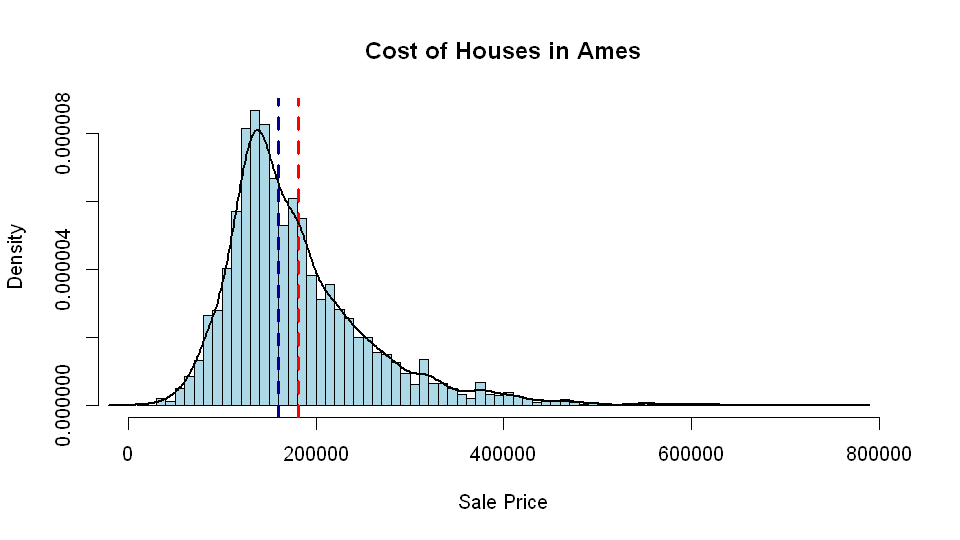

In [10]:
options(repr.plot.height = 4.5, repr.plot.width = 8)
options(scipen=10000)
hist(ames$SalePrice, col = 'light blue', main = 'Cost of Houses in Ames', xlab = 'Sale Price', breaks = 75, xlim = c(0,800000), freq = FALSE)
abline(v = mean(ames$SalePrice), col = 'red', lty = 2, lwd = 3)
abline(v = median(ames$SalePrice), col = 'dark blue', lty = 2, lwd = 3)
lines(density(ames$SalePrice), col = 'black', lwd = 2)

The histogram of the sale price is right skewed. The mean is higher than the median. There are also a good number of outliers.

### Looking at Other Features

In order to predict the sale price, let's look at how other variables influence the price.

What neighborhood were the houses from?


Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  Greens 
     28      10      30     107      44     267     103     193     165       8 
GrnHill  IDOTRR Landmrk MeadowV Mitchel   NAmes NoRidge NPkVill NridgHt  NWAmes 
      2      92       1      37     114     443      71      23     166     131 
OldTown  Sawyer SawyerW Somerst StoneBr   SWISU  Timber Veenker 
    239     151     125     182      51      48      72      24 

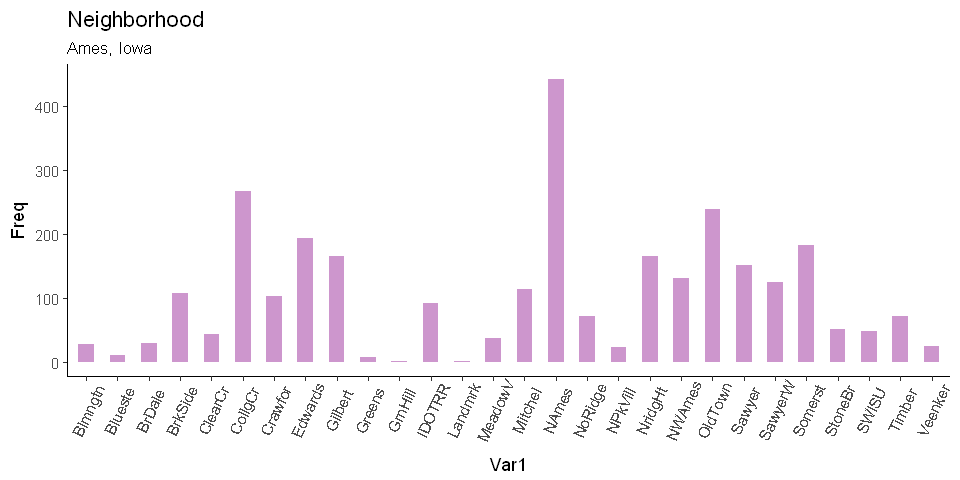

In [58]:
table(ames$Neighborhood)
theme_set(theme_classic())
options(repr.plot.height = 4, repr.plot.width = 8)
ggplot(as.data.frame.table(table(ames$Neighborhood)), aes(Var1, Freq)) + 
    geom_bar(stat = "identity", width = 0.5, fill = "plum3") + 
    labs(title = "Neighborhood", subtitle = "Ames, Iowa") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6))

What was the general condition of the houses? (1 = poor, 10 = excellent)


   1    2    3    4    5    6    7    8    9 
   7   10   50  101 1654  532  388  144   41 

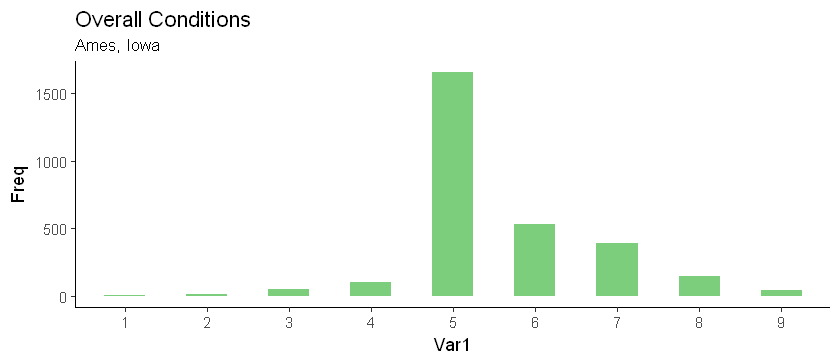

In [42]:
table(ames$Overall.Cond)
options(repr.plot.height = 3, repr.plot.width = 7)
ggplot(as.data.frame.table(table(ames$Overall.Cond)), aes(Var1, Freq)) + 
    geom_bar(stat = "identity", width = 0.5, fill = "palegreen3") + 
    labs(title = "Overall Conditions", subtitle = "Ames, Iowa")

## How Other Features Compare with Sale Price

### Numerical Features

Let's look at a few key numerical features at once and see how they correlate with sale price.

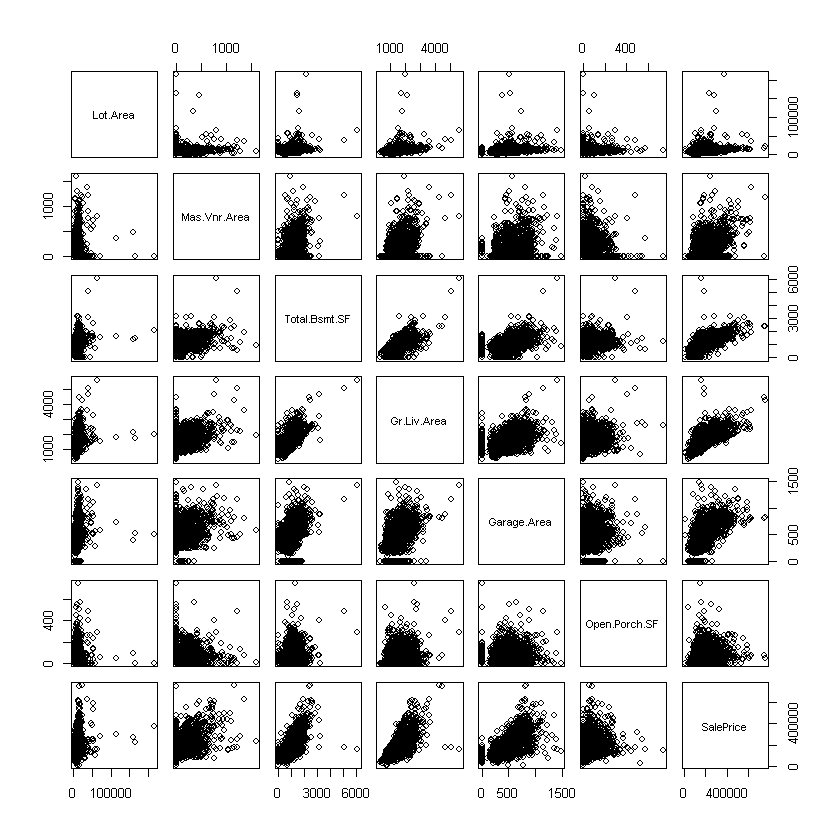

In [13]:
options(repr.plot.height = 7, repr.plot.width = 7)
num_vars <- c("Lot.Area", "Mas.Vnr.Area", "Total.Bsmt.SF", "Gr.Liv.Area", "Garage.Area", "Open.Porch.SF", "SalePrice")
plot(ames[, num_vars])

Most seem to be positively correlated with one another. Notably, they all seem positively correlated with sale price.

### Categorical Features

How about a few key categorical features? Let's compare prices with the year they were built.

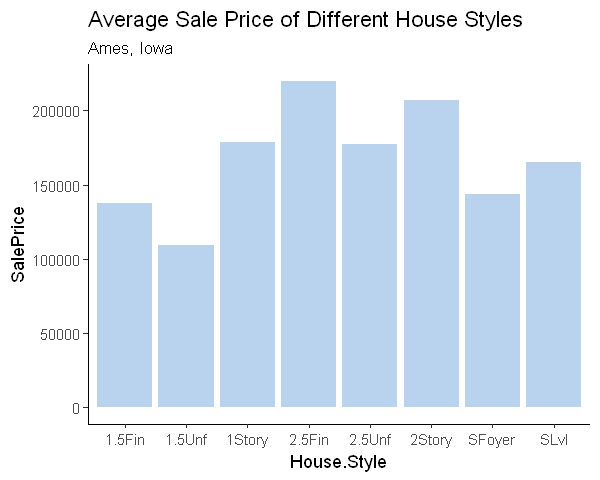

In [56]:
options(repr.plot.height = 4, repr.plot.width = 5)
ggplot(ames, aes(x=House.Style, y=SalePrice)) + 
    stat_summary(fun.y="mean", geom="bar", fill = "slategray2") +
    labs(title = "Average Sale Price of Different House Styles", subtitle = "Ames, Iowa")

From the graph, one and a half story unfinished homes (1.5Unf) tend to cost the least and 2.5 story finished homes (2.5Fin) tend to cost the most. Finished homes cost more than unfinished homes and 2 or 2.5 story homes cost more than single story homes. Overall, logically this graph makes sense and aligns with what you'd think when it comes to purchasing homes.

Let's also look at how neighborhoods relate to sale price.

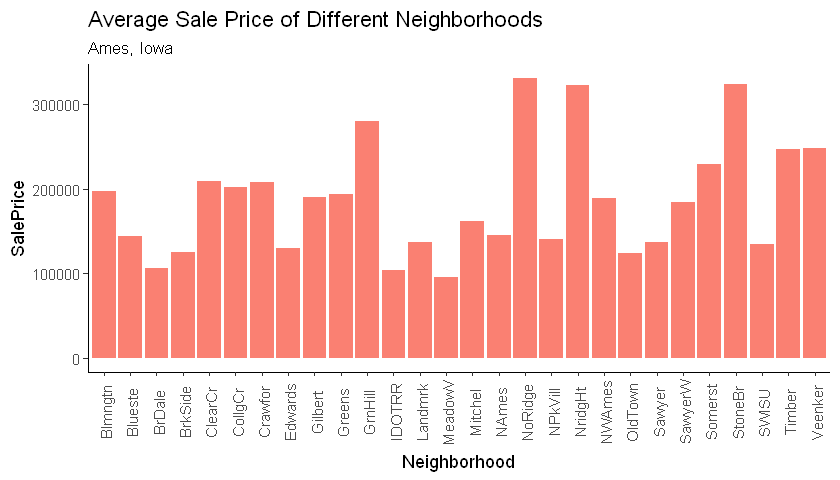

In [53]:
options(repr.plot.height = 4, repr.plot.width = 7)
ggplot(ames, aes(x=Neighborhood, y=SalePrice)) + 
    stat_summary(fun.y="mean", geom="bar", fill = "salmon") +
    labs(title = "Average Sale Price of Different Neighborhoods", subtitle = "Ames, Iowa") +
    theme(axis.text.x = element_text(angle=90, vjust=0.6))

From the graph, you can assume that Northridge (NoRidge), Northridge Heights (NridgHt), Stone Brook (StoneBr), and Green Hill (GrnHill) are the more affluent neighborhoods and Briardale (BrDale), Iowa DOT and Rail Road (IDOTRR), Meadow Village (MeadowV) are the less affluent neighborhoods.

Which housing foundation types cost more than others? 

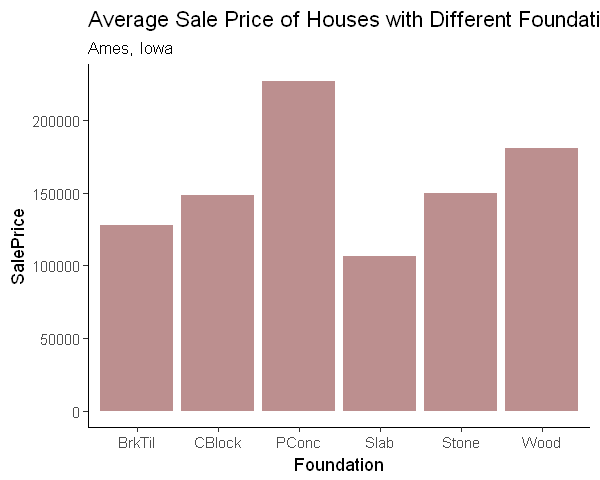

In [57]:
ggplot(ames, aes(x=Foundation, y=SalePrice)) + 
    stat_summary(fun.y="mean", geom="bar", fill = "rosybrown") +
    labs(title = "Average Sale Price of Houses with Different Foundation Types", subtitle = "Ames, Iowa")

From this graph, houses with a poured concrete foundation (PConc) tend to cost more than other types of foundation. Slab foundations cost the least. From these different graphs, you can determine which features tend to influence sale price.